In [1]:
import json
import os

%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Visualize bounding boxes.
from PIL import Image, ImageDraw

IMAGES_DIRPATH = "/srv/datasets/nocaps/images/val"
DETECTION_H5PATH = "/srv/share2/kd/nocaps_detectors/features/nocaps_val/tf_faster_rcnn_inception_resnet_v2_atrous_oid_v4_boxes.h5"
ANNOTATIONS_JSONPATH = "/srv/datasets/nocaps/annotations/nocaps_val_4500_image_info.json"

# This should contain an "images" key - a list of image info dicts (in COCO format).
# We don't care about other fields: "annotations", "categories" etc.
image_info_json = json.load(open(ANNOTATIONS_JSONPATH))

detection_h5 = h5py.File(DETECTION_H5PATH, "r")

IMAGE ID:  0
INDEX IN H5 FILE: 0


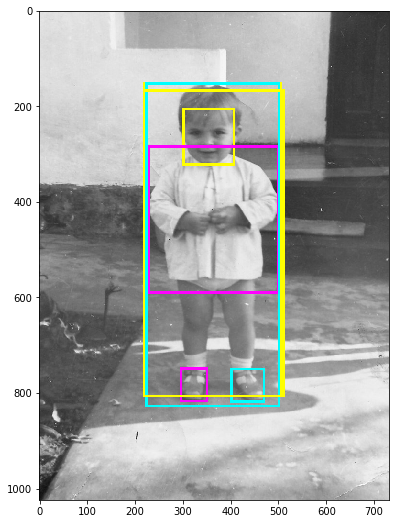

In [2]:
# This is NOT the Image ID, this is index of Image ID in the H5 file.
RANDOM_IMAGE_INDEX = 0

random_image_filename = image_info_json["images"][RANDOM_IMAGE_INDEX]["file_name"]
random_image_id = image_info_json["images"][RANDOM_IMAGE_INDEX]["id"]
print("IMAGE ID: ", random_image_id)

image = Image.open(os.path.join(IMAGES_DIRPATH, random_image_filename)).convert("RGB")
image_draw = ImageDraw.Draw(image)

image_h5_index = [i for i, _id in enumerate(detection_h5["image_id"][:]) if _id == int(random_image_id)][0]
print("INDEX IN H5 FILE:", image_h5_index)

boxes = detection_h5['boxes'][image_h5_index]
boxes = boxes.reshape((-1, 4))

# Visualize top-30 boxes
for i, box in enumerate(boxes[:30]):

    # Visualize in different colors for clarity.
    if i % 3 == 0:
        image_draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="yellow", width=5)
    elif i % 3 == 1:
        image_draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="magenta", width=5)
    elif i % 3 == 2:
        image_draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="cyan", width=5)

image.save(f"visualized_boxes_{random_image_id}.png")
image = np.array(image)
plt.figure(figsize=(9, 9))
plt.imshow(image)